In [56]:
import numpy as np
from PIL import Image, ImageDraw
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
image_path='segment.jpg'

In [4]:
imgori=Image.open(image_path)

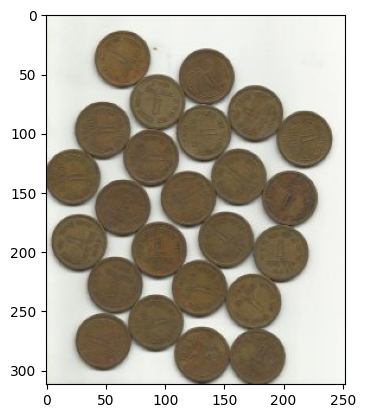

In [5]:
plt.imshow(imgori,cmap='gray')
plt.show()

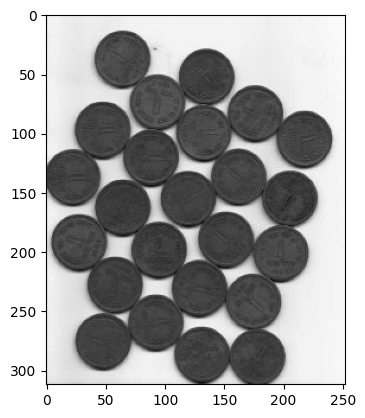

In [6]:
img = imgori.convert('L')  # Convert to grayscale
plt.imshow(img,cmap='gray')
plt.show()

In [7]:
#convert to pixels
pixels = np.array(img)
pixels

array([[234, 239, 242, ..., 249, 250, 250],
       [234, 239, 242, ..., 250, 250, 251],
       [234, 239, 242, ..., 250, 250, 251],
       ...,
       [212, 231, 232, ..., 246, 246, 246],
       [206, 225, 227, ..., 245, 245, 245],
       [200, 219, 222, ..., 244, 244, 244]], dtype=uint8)

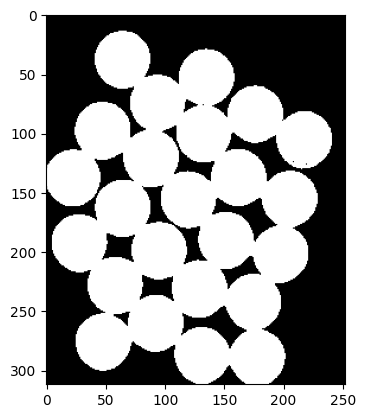

In [8]:
# Apply segmentation based on a simple intensity threshold
threshold=128
segmented_pixels = np.where(pixels < threshold, 255, 0).astype(np.uint8)
plt.imshow(segmented_pixels,cmap='gray')
plt.show()

In [9]:
segmented_pixels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Erosion

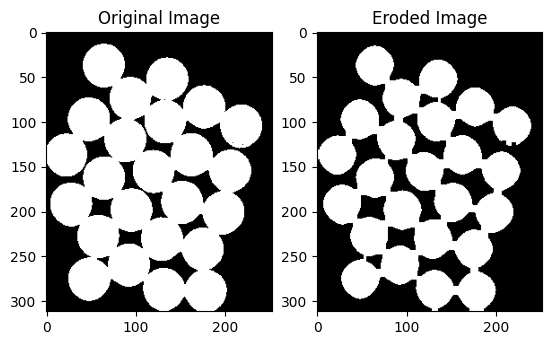

In [13]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(segmented_pixels,kernel,iterations = 1)
plt.subplot(1, 2, 1), plt.imshow(segmented_pixels, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(erosion, cmap='gray'), plt.title('Eroded Image')
plt.show()

Dilation

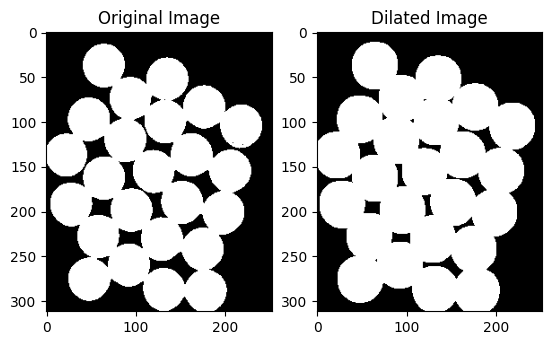

In [15]:
kernel = np.ones((5,5),np.uint8)
dilated = cv2.dilate(segmented_pixels,kernel,iterations = 1)
plt.subplot(1, 2, 1), plt.imshow(segmented_pixels, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(dilated, cmap='gray'), plt.title('Dilated Image')
plt.show()

Opening: Erosion + Dilation

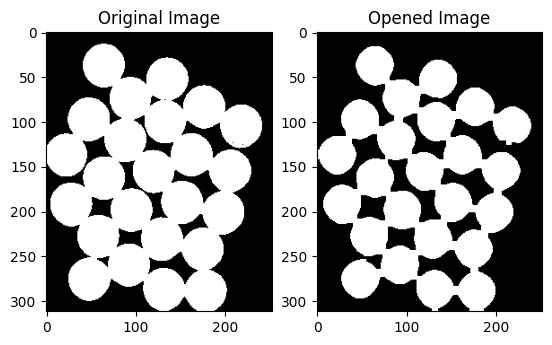

In [28]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(segmented_pixels,kernel,iterations = 2)
opened= cv2.dilate(erosion,kernel,iterations = 1)
plt.subplot(1, 2, 1), plt.imshow(segmented_pixels, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(opened, cmap='gray'), plt.title('Opened Image')
plt.show()

Closing: Dilation + Erosion

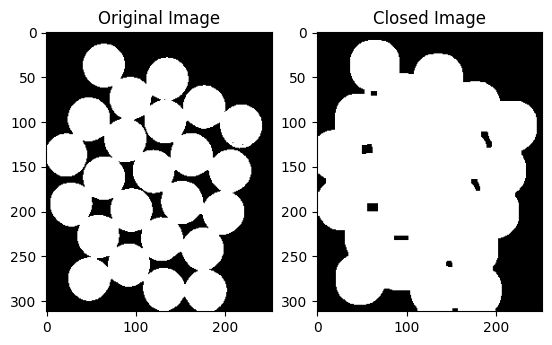

In [34]:
kernel = np.ones((5,5),np.uint8)
dilated= cv2.dilate(segmented_pixels,kernel,iterations = 3)
closed = cv2.erode(dilated,kernel,iterations = 1)
plt.subplot(1, 2, 1), plt.imshow(segmented_pixels, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(closed, cmap='gray'), plt.title('Closed Image')
plt.show()

Hit and Miss Transform

In [135]:
input_image=np.array([[0,255,0,0,0],[255,0,255,0,0],[0,255,0,255,0],[0,255,255,255,255],[0,0,0,255,0]])
input_image = Image.fromarray(input_image)
#input_image = cv2.cvtColor(np.array(input_image), cv2.COLOR_BGR2GRAY)

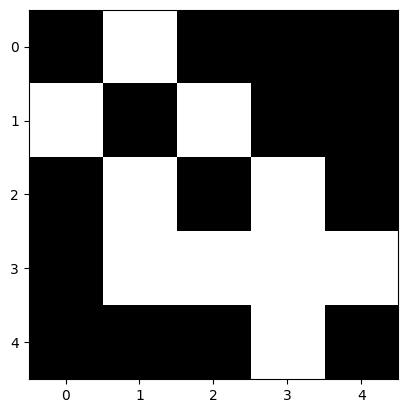

In [136]:
plt.imshow(input_image,cmap='gray')

In [137]:
input_image=np.array(input_image)/255
print(input_image)
input_image=np.array(input_image).astype(np.int8)

[[0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0.]
 [0. 1. 1. 1. 1.]
 [0. 0. 0. 1. 0.]]


In [138]:
kernel_foreground = [[0, 1, 0], [1, 0, 1], [0, 1, 0]]
kernel_background = [[0, 0, 0], [0, 1, 0], [0, 0, 0]]


In [139]:
kernel_foreground = np.array(kernel_foreground, dtype=np.uint8)
kernel_background = np.array(kernel_background, dtype=np.uint8)

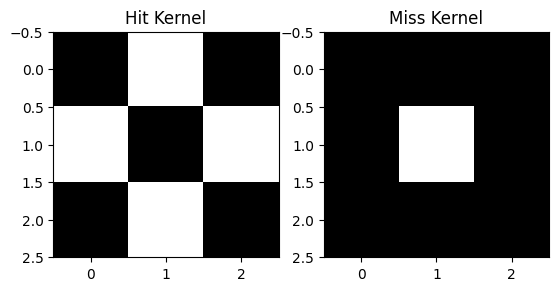

In [147]:
plt.subplot(1, 2, 1), plt.imshow(kernel_foreground, cmap='gray'), plt.title('Hit Kernel')
plt.subplot(1, 2, 2), plt.imshow(kernel_background,cmap='gray'), plt.title('Miss Kernel')
plt.show()

In [140]:
output=np.zeros(input_image.shape)
output

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [141]:
output=np.zeros(input_image.shape)
for i in range(1,input_image.shape[0]-1):
    for j in range(1,input_image.shape[0]-1):
        res=True
        curr_image=input_image[i-1:i+2,j-1:j+2]
        for p in range(curr_image.shape[0]):
            for q in range(curr_image.shape[0]):
                if(kernel_foreground[p][q]==1 and curr_image[p][q]==0) or (kernel_background[p][q]==1 and curr_image[p][q]==1 ):
                    res=False
                    break
            if res==False:
                break
        if res==True:
            output[i][j]=1
        else:
            res=True
            
print(output)

[[0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


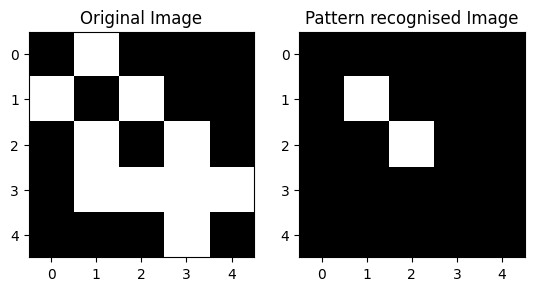

In [144]:
plt.subplot(1, 2, 1), plt.imshow(input_image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(output*255, cmap='gray'), plt.title('Pattern recognised Image')
plt.show()

Region Filling